CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


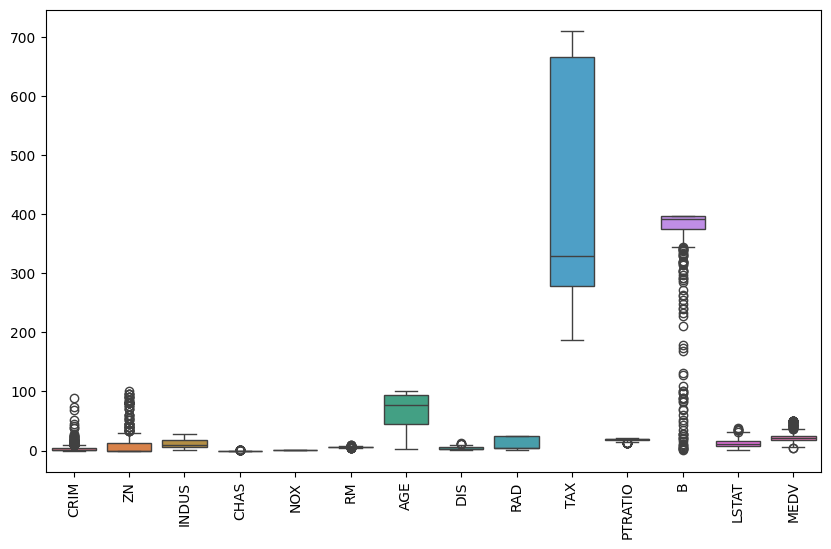

Mean Squared Error (MSE): 14.46
R-squared (R²): 0.72
Accuracy: 72.20%


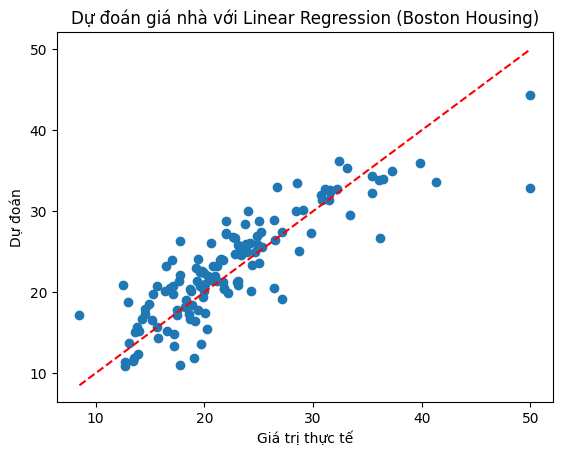

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
boston = pd.read_csv('boston.csv')

# Kiểm tra các giá trị thiếu
print(boston.isnull().sum())  # Kiểm tra các giá trị thiếu trong dữ liệu

# Nếu có giá trị thiếu, bạn có thể thay thế bằng giá trị trung bình (hoặc phương pháp khác)
boston.fillna(boston.mean(), inplace=True)  # Thay thế giá trị thiếu bằng giá trị trung bình của cột

# Kiểm tra sự tồn tại của ngoại lai (outliers)
# Một cách đơn giản để kiểm tra là vẽ boxplot hoặc sử dụng IQR
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=boston)
plt.xticks(rotation=90)
plt.show()

# Nếu bạn phát hiện ngoại lai, có thể xử lý bằng cách loại bỏ hoặc thay thế chúng.
# Ví dụ: bạn có thể loại bỏ các dòng có giá trị ngoại lai trong cột `CRIM`
q1 = boston['CRIM'].quantile(0.25)
q3 = boston['CRIM'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
boston = boston[(boston['CRIM'] >= lower_bound) & (boston['CRIM'] <= upper_bound)]

# Xác định X (đặc trưng) và y (target)
X = boston.drop(columns=['MEDV'])  # Loại bỏ cột MEDV khỏi đặc trưng
y = boston['MEDV']  # Cột MEDV là target

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_pred = regressor.predict(X_test_scaled)

# Tính toán MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = regressor.score(X_test_scaled, y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}") # = 14.79 co nghia la trung binh moi du doan sai so 14.79 so voi gia tri thuc te (MEDV) có nghĩa là mô hình không tốt lắm
print(f"R-squared (R²): {r2:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%") # = 0.78 co nghia la mô hình giải thích được 78% sự biến thiên của dữ liệu có nghĩa là mô hình tương đối tốt
# tại sao lại có 2 giá trị R2 và accuracy khác nhau nhỉ? 
# R2 là hệ số xác định mức độ giải thích của mô hình, còn accuracy là độ chính xác của mô hình dựa trên dữ liệu kiểm tra (test data) nên có thể khác nhau
# vậy đề kêu đánh giá mô hình hình thì ta dùng R2 hay accuracy? 
# đánh giá bằng R2 là phù hợp hơn vì R2 cho biết mức độ giải thích của mô hình trên dữ liệu huấn luyện và kiểm tra 

# Trực quan hóa kết quả (dự đoán vs thực tế)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Đường dự đoán lý tưởng
plt.xlabel("Giá trị thực tế")
plt.ylabel("Dự đoán")
plt.title("Dự đoán giá nhà với Linear Regression (Boston Housing)")
plt.show()
